# Exploratory Data Analysis

## Breast Cancer Data

Let's load all the dataset to get an understanding of their structure and content, and move forward with data exploration, cleaning, and preparation.

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the datasets
patients_df = pd.read_csv('data/Patients.csv')

# Display the first few rows of the dataset
patients_df.head()

,PATIENTID,GENDER,ETHNICITY,DECEASED,DEATHCAUSECODE_1A,DEATHLOCATIONCODE,VITALSTATUS,VITALSTATUSDATE
0,10273711,1,NaN,N,NaN,NaN,A,5/7/2022
1,10275818,1,A,Y,K566,4,D,20/10/2021
2,10276182,1,A,Y,J189,1,D,18/7/2020
3,10277943,1,A,N,NaN,NaN,A,5/7/2022
4,10279280,1,A,Y,C19,4,D,31/7/2022


In [3]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181241 entries, 0 to 181240
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PATIENTID          181241 non-null  int64 
 1   GENDER             181241 non-null  int64 
 2   ETHNICITY          178646 non-null  object
 3   DECEASED           181241 non-null  object
 4   DEATHCAUSECODE_1A  31989 non-null   object
 5   DEATHLOCATIONCODE  31984 non-null   object
 6   VITALSTATUS        181241 non-null  object
 7   VITALSTATUSDATE    181210 non-null  object
dtypes: int64(2), object(6)
memory usage: 11.1+ MB


The Patients dataset contains **181,241** entries with 8 columns.

Here's a summary of the dataset:

- PATIENTID: Unique identifier for each patient.
- GENDER: Gender of the patient (1 likely indicates male and 2 female).
- ETHNICITY: Ethnic group of the patient (with some missing values).
- DECEASED: Indicator for whether the patient is deceased (Y or N).
- DEATHCAUSECODE_1A: Death cause code (many missing values).
- DEATHLOCATIONCODE: Code for the location of death (also many missing values).
- VITALSTATUS: Status of the patient (A for alive, D for deceased).
- VITALSTATUSDATE: Date when the vital status was recorded.

In [4]:
# Load the Diagnosis dataset
diagnosis_df = pd.read_csv('data/Diagnosis.csv') 

# Display the first few rows and dataset info
diagnosis_df.head()


,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,ER_STATUS,PR_STATUS,HER2_STATUS,QUINTILE_2019,DATE_FIRST_SURGERY,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CHRL_TOT_27_03,COMORBIDITIES_27_03
0,10300617,2/11/2019,C50 (Breast Cancer),2,0,1b,3A,G3,46,P,P,N,2,30/11/2019,NaN,NaN,0.0,NaN
1,10300637,5/6/2018,C50 (Breast Cancer),NaN,NaN,NaN,?,G1,87,P,NaN,N,4,NaN,Z,NaN,0.0,NaN
2,10300641,26/1/2019,C50 (Breast Cancer),1c,0,0,1A,G2,87,NaN,NaN,NaN,1 - most deprived,NaN,Z,4.0,0.0,NaN
3,10300713,9/12/2017,C50 (Breast Cancer),2,0,0,2A,G2,74,U,NaN,N,5 - least deprived,13/2/2018,C,9.0,0.0,NaN
4,10300729,21/7/2019,C50 (Breast Cancer),3,1,0,2B,G3,71,NaN,NaN,P,3,19/8/2019,NaN,2.0,0.0,NaN


In [5]:
diagnosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187204 entries, 0 to 187203
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PATIENTID             187204 non-null  int64  
 1   DIAGNOSISDATEBEST     187204 non-null  object 
 2   SITE_ICD10_O2_3CHAR   187204 non-null  object 
 3   T_BEST                171382 non-null  object 
 4   N_BEST                169038 non-null  object 
 5   M_BEST                132926 non-null  object 
 6   STAGE_BEST            187203 non-null  object 
 7   GRADE                 187204 non-null  object 
 8   AGE                   187204 non-null  int64  
 9   ER_STATUS             166238 non-null  object 
 10  PR_STATUS             114933 non-null  object 
 11  HER2_STATUS           153626 non-null  object 
 12  QUINTILE_2019         187204 non-null  object 
 13  DATE_FIRST_SURGERY    158771 non-null  object 
 14  CANCERCAREPLANINTENT  119160 non-null  object 
 15  

The Diagnosis dataset contains **187,204** entries with 18 columns.

- PATIENTID: Unique identifier for each patient (same as in the Patients dataset).
- DIAGNOSISDATEBEST: The date of the best diagnosis.
- SITE_ICD10_O2_3CHAR: Cancer site information (all seem to relate to breast cancer).
- T_BEST, N_BEST, M_BEST: Tumor, node, and metastasis stages.
- STAGE_BEST: The stage of cancer (some missing values).
- GRADE: Cancer grade (G1 to G3).
- AGE: Age of the patient at diagnosis (critical for cohort comparison).
- ER_STATUS, PR_STATUS, HER2_STATUS: Receptor statuses for estrogen, progesterone, and HER2.
- QUINTILE_2019: A socioeconomic deprivation index (1 to 5).
- DATE_FIRST_SURGERY: The date of the first surgery (many missing values).
- CANCERCAREPLANINTENT: Treatment plan (some missing values).
- PERFORMANCESTATUS: Patient’s performance status (missing values).
- CHRL_TOT_27_03: Chronic health risk score (missing values).
- COMORBIDITIES_27_03: Comorbidity data (mostly missing).

In [6]:
# Load the Treatment dataset
treatment_df = pd.read_csv('data/Treatment.csv')

# Display the first few rows and dataset info
treatment_df.head()

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP
0,10282626,1.60,NaN,NaN,18/9/2017,NaN,NaN,CISPLATIN + GEMCITABINE
1,10291762,1.53,46.95,NaN,8/3/2020,NaN,NaN,CAPECITABINE + MITOMYCIN
2,10292545,NaN,72.20,NaN,9/12/2017,NaN,N,IMATINIB
3,10293472,1.64,67.20,NaN,25/8/2017,NaN,N,TRIAL UNSPECIFIED
4,10297710,1.57,102.00,2/7/2016,8/8/2016,2,N,CISPLATIN


In [7]:
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147805 entries, 0 to 147804
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ENCORE_PATIENT_ID           147805 non-null  int64  
 1   HEIGHT_AT_START_OF_REGIMEN  139731 non-null  float64
 2   WEIGHT_AT_START_OF_REGIMEN  140348 non-null  float64
 3   DATE_DECISION_TO_TREAT      137545 non-null  object 
 4   START_DATE_OF_REGIMEN       147617 non-null  object 
 5   CLINICAL_TRIAL              141739 non-null  object 
 6   CHEMO_RADIATION             109976 non-null  object 
 7   BENCHMARK_GROUP             147805 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.0+ MB


The Treatment dataset contains **147,805** entries with 8 columns.

- ENCORE_PATIENT_ID: Unique identifier for each patient (similar to PATIENTID in the other datasets).
- HEIGHT_AT_START_OF_REGIMEN: Patient's height at the start of treatment (some missing values).
- WEIGHT_AT_START_OF_REGIMEN: Patient's weight at the start of treatment (some missing values).
- DATE_DECISION_TO_TREAT: Date the treatment decision was made (some missing values).
- START_DATE_OF_REGIMEN: Date the treatment regimen started.
- CLINICAL_TRIAL: Whether the patient participated in a clinical trial (missing values).
- CHEMO_RADIATION: Indicator if the treatment involved chemotherapy or radiation (missing values).
- BENCHMARK_GROUP: The treatment group (e.g., specific chemotherapy or trial regimen).

In [8]:
# Load the Data Dictionary
data_dict_df = pd.read_excel('data/Data_Dictionary.xlsx')

# Display the first few rows and dataset info
data_dict_df.head()

,Field name,Data item,Data format,Notes
0,PATIENTID,Pseudonymised patient ID,Integer,NaN
1,GENDER,Person stated gender,Character,Consult z_gender in all_z_lookup_tables.csv fo...
2,ETHNICITY,Ethnicity,Character,Consult z_ethnicity in all_z_lookup_tables.csv...
3,DECEASED,Indicates if the Patient has deceased,Character,NaN
4,DEATHCAUSECODE_1A,As provided with death notification,Character,Codes are in ICD-10 format and may be a comma-...


In [9]:
data_dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Field name   9 non-null      object
 1   Data item    9 non-null      object
 2   Data format  9 non-null      object
 3   Notes        7 non-null      object
dtypes: object(4)
memory usage: 416.0+ bytes


The Data Dictionary provides a brief description of the fields in the datasets:

- PATIENTID: Pseudonymized patient ID.
- GENDER: Person-stated gender (character format).
- ETHNICITY: Ethnicity (character format).
- DECEASED: Indicates if the patient has deceased.
- DEATHCAUSECODE_1A: Death cause code (in ICD-10 format).

In [10]:
# Load the Lookup Tables
lookup_tables_df = pd.read_excel('data/Lookup_Tables.xlsx')

# Display the first few rows and dataset info
lookup_tables_df.head()

,Code,Description
0,1,Hospital
1,2,"Hospice NOS, NHS hospice / specialist palliati..."
2,3,Voluntary hospice / specialist palliative care...
3,4,"Other private residence (e.g. relatives home, ..."
4,5,"Care home, care home with nursing, nursing home"


In [11]:
lookup_tables_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         7 non-null      object
 1   Description  7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


The Lookup Tables provide a list of codes and their descriptions, specifically related to the DEATHLOCATIONCODE column in the Patients dataset. This can help clarify the death location descriptions (e.g., Hospital, Hospice, Care Home).

### Overview

The datasets appear to contain a variety of information. Here’s a brief overview of the contents:

1. Data Dictionary: This file defines the fields in the dataset, such as PATIENTID, GENDER, ETHNICITY, DECEASED, etc., with additional information on each field's format and any related notes.
2. Diagnosis Data: Contains patient diagnoses, including information like PATIENTID, DIAGNOSISDATEBEST, cancer stage, grade, and other related clinical data.
3. Lookup Tables: Likely contains reference data that could help with understanding other fields, such as codes for cancer types, ethnicities, or other factors (not fully visible yet).
4. Patients Data: Includes patient-specific data like PATIENTID, height, weight, decision dates, clinical trial participation, and regimen data.
5. Treatment Data: Provides information about the treatment each patient underwent, such as regimen details and group classification.

## Data Cleaning

We need to clean the data so that when doing cohort analysis. We do not have incorrect findings, therefore before cohort identification:

### Observations on Missing Data:

- Patients.csv: There are missing values in ETHNICITY, DEATHCAUSECODE_1A, DEATHLOCATIONCODE, and VITALSTATUSDATE.
- Diagnosis.csv: Missing values are most significant in T_BEST, N_BEST, M_BEST, ER_STATUS, PR_STATUS, HER2_STATUS DATE_FIRST_SURGERY, CANCERCAREPLANINTENT, PERFORMANCESTATUS, and COMORBIDITIES_27_03.
- Treatment.csv: Missing values are observed in HEIGHT_AT_START_OF_REGIMEN, WEIGHT_AT_START_OF_REGIMEN, DATE_DECISION_TO_TREAT, CLINICAL_TRIAL, and CHEMO_RADIATION.

In [12]:
# Handle missing values by checking the number of missing entries in each column
patients_missing = patients_df.isnull().sum()
# Display missing data summary and converted date columns
patients_missing

PATIENTID                 0
GENDER                    0
ETHNICITY              2595
DECEASED                  0
DEATHCAUSECODE_1A    149252
DEATHLOCATIONCODE    149257
VITALSTATUS               0
VITALSTATUSDATE          31
dtype: int64

In [13]:
diagnosis_missing = diagnosis_df.isnull().sum()

diagnosis_missing

PATIENTID                    0
DIAGNOSISDATEBEST            0
SITE_ICD10_O2_3CHAR          0
T_BEST                   15822
N_BEST                   18166
M_BEST                   54278
STAGE_BEST                   1
GRADE                        0
AGE                          0
ER_STATUS                20966
PR_STATUS                72271
HER2_STATUS              33578
QUINTILE_2019                0
DATE_FIRST_SURGERY       28433
CANCERCAREPLANINTENT     68044
PERFORMANCESTATUS        72370
CHRL_TOT_27_03              70
COMORBIDITIES_27_03     161141
dtype: int64

In [14]:
treatment_missing = treatment_df.isnull().sum()
treatment_missing

ENCORE_PATIENT_ID                 0
HEIGHT_AT_START_OF_REGIMEN     8074
WEIGHT_AT_START_OF_REGIMEN     7457
DATE_DECISION_TO_TREAT        10260
START_DATE_OF_REGIMEN           188
CLINICAL_TRIAL                 6066
CHEMO_RADIATION               37829
BENCHMARK_GROUP                   0
dtype: int64

In [15]:
# Convert date columns to datetime format
patients_df['VITALSTATUSDATE'] = pd.to_datetime(
    patients_df['VITALSTATUSDATE'], errors='coerce')
diagnosis_df['DIAGNOSISDATEBEST'] = pd.to_datetime(
    diagnosis_df['DIAGNOSISDATEBEST'], errors='coerce')
treatment_df['START_DATE_OF_REGIMEN'] = pd.to_datetime(
    treatment_df['START_DATE_OF_REGIMEN'], errors='coerce')

/var/folders/ss/lyb76ms57n90jdlgjkqwn2340000gn/T/ipykernel_65088/2647941831.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  patients_df['VITALSTATUSDATE'] = pd.to_datetime(
/var/folders/ss/lyb76ms57n90jdlgjkqwn2340000gn/T/ipykernel_65088/2647941831.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  diagnosis_df['DIAGNOSISDATEBEST'] = pd.to_datetime(
/var/folders/ss/lyb76ms57n90jdlgjkqwn2340000gn/T/ipykernel_65088/2647941831.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  treatment_df['START_DATE_OF_REGIMEN'] = pd.to_datetime(


In [16]:
patients_df['VITALSTATUSDATE'].head()

0   2022-05-07
1   2021-10-20
2   2020-07-18
3   2022-05-07
4   2022-07-31
Name: VITALSTATUSDATE, dtype: datetime64[ns]

In [17]:
diagnosis_df['DIAGNOSISDATEBEST'].head()

0   2019-02-11
1   2018-05-06
2   2019-01-26
3   2017-09-12
4   2019-07-21
Name: DIAGNOSISDATEBEST, dtype: datetime64[ns]

In [18]:
treatment_df['START_DATE_OF_REGIMEN'].head()

0   2017-09-18
1   2020-08-03
2   2017-09-12
3   2017-08-25
4   2016-08-08
Name: START_DATE_OF_REGIMEN, dtype: datetime64[ns]

The VITALSTATUSDATE, DIAGNOSISDATEBEST, and START_DATE_OF_REGIMEN columns have been successfully converted to datetime format.

The data has been cleaned, and we've filtered out rows with missing essential values such as AGE, STAGE_BEST, GRADE, and START_DATE_OF_REGIMEN/BENCHMARK_GROUP. This will help in cohort identification.

In [19]:
# Cleaning missing values for key variables (focusing on essential ones for analysis)
# We will drop rows with missing 'AGE', 'STAGE_BEST', and 'GRADE' 
# from the Diagnosis dataset, as they are key to cohort creation.
diagnosis_clean_df = diagnosis_df.dropna(
    subset=['AGE', 'STAGE_BEST', 'GRADE'])

# For the Treatment dataset, we'll filter out rows with missing 
# 'START_DATE_OF_REGIMEN' or 'BENCHMARK_GROUP' for cohort identification
treatment_clean_df = treatment_df.dropna(
    subset=['START_DATE_OF_REGIMEN', 'BENCHMARK_GROUP'])

In [20]:

# Checking the cleaned data
diagnosis_clean_df.head()

,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2_3CHAR,T_BEST,N_BEST,M_BEST,STAGE_BEST,GRADE,AGE,ER_STATUS,PR_STATUS,HER2_STATUS,QUINTILE_2019,DATE_FIRST_SURGERY,CANCERCAREPLANINTENT,PERFORMANCESTATUS,CHRL_TOT_27_03,COMORBIDITIES_27_03
0,10300617,2019-02-11,C50 (Breast Cancer),2,0,1b,3A,G3,46,P,P,N,2,30/11/2019,NaN,NaN,0.0,NaN
1,10300637,2018-05-06,C50 (Breast Cancer),NaN,NaN,NaN,?,G1,87,P,NaN,N,4,NaN,Z,NaN,0.0,NaN
2,10300641,2019-01-26,C50 (Breast Cancer),1c,0,0,1A,G2,87,NaN,NaN,NaN,1 - most deprived,NaN,Z,4.0,0.0,NaN
3,10300713,2017-09-12,C50 (Breast Cancer),2,0,0,2A,G2,74,U,NaN,N,5 - least deprived,13/2/2018,C,9.0,0.0,NaN
4,10300729,2019-07-21,C50 (Breast Cancer),3,1,0,2B,G3,71,NaN,NaN,P,3,19/8/2019,NaN,2.0,0.0,NaN


In [21]:
treatment_clean_df.head()

,ENCORE_PATIENT_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP
0,10282626,1.60,NaN,NaN,2017-09-18,NaN,NaN,CISPLATIN + GEMCITABINE
1,10291762,1.53,46.95,NaN,2020-08-03,NaN,NaN,CAPECITABINE + MITOMYCIN
2,10292545,NaN,72.20,NaN,2017-09-12,NaN,N,IMATINIB
3,10293472,1.64,67.20,NaN,2017-08-25,NaN,N,TRIAL UNSPECIFIED
4,10297710,1.57,102.00,2/7/2016,2016-08-08,2,N,CISPLATIN


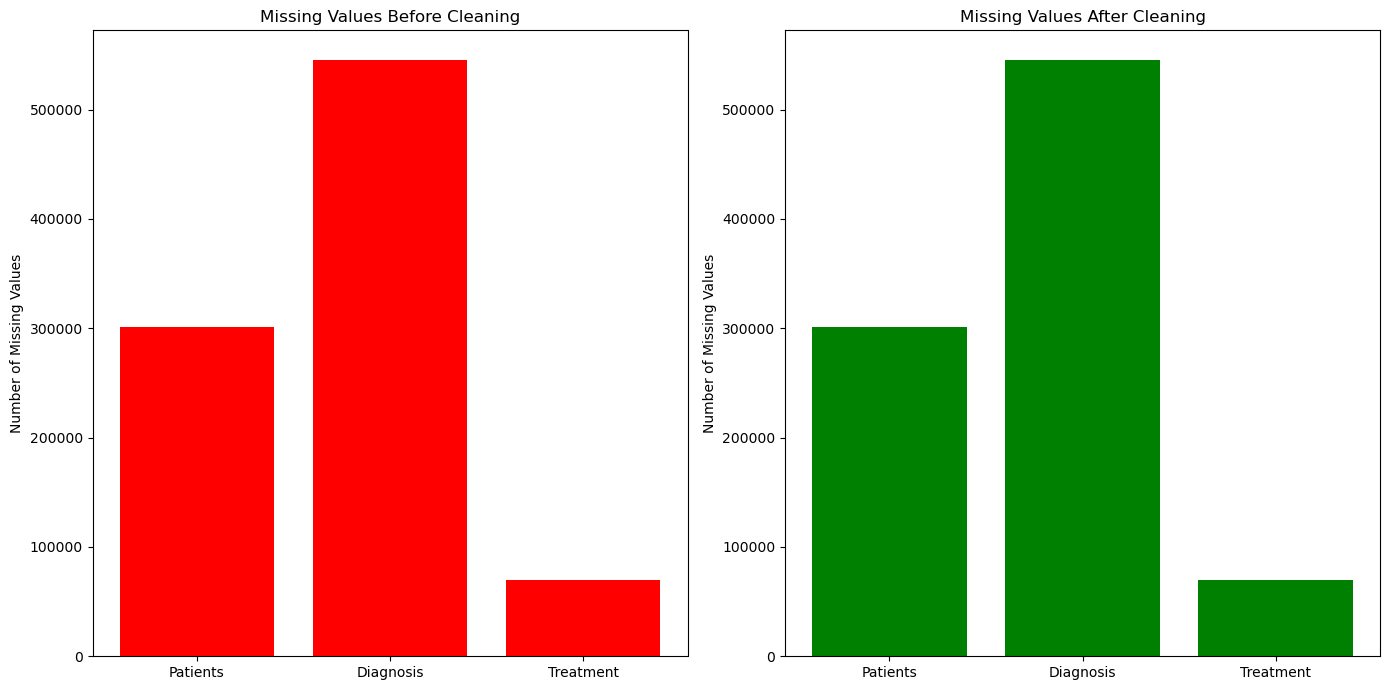

(   PATIENTID  GENDER ETHNICITY DECEASED DEATHCAUSECODE_1A DEATHLOCATIONCODE  \
 0   10273711       1       NaN        N               NaN               NaN   
 1   10275818       1         A        Y              K566                 4   
 2   10276182       1         A        Y              J189                 1   
 3   10277943       1         A        N               NaN               NaN   
 4   10279280       1         A        Y               C19                 4   
 
   VITALSTATUS VITALSTATUSDATE  
 0           A      2022-05-07  
 1           D      2021-10-20  
 2           D      2020-07-18  
 3           A      2022-05-07  
 4           D      2022-07-31  ,
    PATIENTID DIAGNOSISDATEBEST  SITE_ICD10_O2_3CHAR T_BEST N_BEST M_BEST  \
 0   10300617        2019-02-11  C50 (Breast Cancer)      2      0     1b   
 1   10300637        2018-05-06  C50 (Breast Cancer)    NaN    NaN    NaN   
 2   10300641        2019-01-26  C50 (Breast Cancer)     1c      0      0   
 3   103007

In [22]:
# Plotting missing values comparison
missing_before = {
    'Patients': patients_missing,
    'Diagnosis': diagnosis_missing,
    'Treatment': treatment_missing
}

# After cleaning
missing_after = {
    'Patients': patients_df.isnull().sum(),
    'Diagnosis': diagnosis_clean_df.isnull().sum(),
    'Treatment': treatment_clean_df.isnull().sum()
}

# Plotting missing data before and after cleaning
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Before cleaning
ax[0].bar(missing_before.keys(), [sum(missing_before[key]) for key in missing_before], color='red')
ax[0].set_title('Missing Values Before Cleaning')
ax[0].set_ylabel('Number of Missing Values')

# After cleaning
ax[1].bar(missing_after.keys(), [sum(missing_after[key]) for key in missing_after], color='green')
ax[1].set_title('Missing Values After Cleaning')
ax[1].set_ylabel('Number of Missing Values')

plt.tight_layout()
plt.show()

# Displaying the cleaned data previews
patients_df.head(), diagnosis_clean_df.head(), treatment_clean_df.head()
